In [1]:
import numpy as np
from IBP import *
import numpy as np
import matplotlib.pyplot as plt
import cython
import timeit
import math
import time
import numpy as np
from IBP import IBP
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
%load_ext cython

In [2]:
V1 = np.array([
    1, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0
])
V2 = np.array([
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0,
    1, 1, 1, 0, 0, 0
])
V3 = np.array([
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1
])
V4 = np.array([
    0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 0, 1,
    0, 0, 0, 0, 0, 1,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0
])
V5 = np.array([
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 1, 1, 1, 0, 0,
    0, 0, 1, 0, 0, 0,
    0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0
])
V = [V1, V2, V3, V4, V5]

N = 100
D1 = np.outer(np.random.binomial(1, 0.5, N), V1)
D2 = np.outer(np.random.binomial(1, 0.5, N), V2)
D3 = np.outer(np.random.binomial(1, 0.5, N), V3)
D4 = np.outer(np.random.binomial(1, 0.5, N), V4)
D5 = np.outer(np.random.binomial(1, 0.5, N), V5)
X = D1 + D2 + D3 + D4 + D5
X = X[np.sum(X, axis = 1) > 0] * 1.0
X += np.random.normal(0, 0.1, X.shape)
print(X.shape)

(99, 36)


In [ ]:
fig, ax = plt.subplots(1,5,figsize = (10,2))
for i in range(5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow((1-V[i]).reshape(6,6), 'gray')
#plt.savefig('paper/tetris.png', bbox_inches='tight')

In [15]:
ibp = IBP(X, alpha = (1,1,1), sigma_X = (1,1,1), sigma_A = (1,1,1))
hist = ibp.MCMC(1000)
#print("K", history["K"])
#print("alpha", history["alpha"])
#print("sigma_X", history["sigma_X"])
#print("sigma_A", history["sigma_A"])

Current K = 8: 100%|██████████| 1000/1000 [03:38<00:00,  4.11it/s]


In [ ]:
fig, ax = plt.subplots(4,1,sharex = True, figsize = (12,8))
ax[0].plot(hist['K'])
ax[0].set_ylabel('K', fontsize = 17)
ax[0].set_ylim(0,10)
ax[1].plot(hist['alpha'])
ax[1].set_ylabel('$\\alpha$',fontsize = 17)
ax[1].set_ylim(0,120)
ax[2].plot(hist['sigma_X'])
ax[2].set_ylabel('$\\sigma_X$',fontsize = 17)
ax[2].set_ylim(0,1.2)
ax[3].plot(hist['sigma_A'])
ax[3].set_ylabel('$\\sigma_A$',fontsize = 17)
ax[3].set_ylim(0,1.2)
plt.xlim(0,1000)
for i in range(4):
    ax[i].tick_params(labelsize=15)
fig.align_ylabels(ax)
#plt.savefig('paper/gibbsresultblock.png', bbox_inches='tight')

In [ ]:
def feature_map(feature, X_prior, Z, shape, order, truncate = None):
    feature = feature[order, :]
    Z = Z[:, order]
    if truncate is not None:
        feature = feature[:truncate, :]
        Z = Z[:, :truncate]
    X_post = Z @ feature
    f = plt.figure(figsize = (18,12))
    plt.axis('off')
    positive = np.tile(np.array([[[0.29803923, 0.6431373, 0.24705882]]]), reps = (*shape, 1))
    negative = np.tile(np.array([[[0.9, 0.9, 0.9]]]), reps = (*shape, 1))
    grid = gridspec.GridSpec(nrows = (X_prior.shape[0] + 1), ncols = (feature.shape[0] + 2), figure = f)
    for idf in range(feature.shape[0]):
        sp = f.add_subplot(grid[0, idf + 1])
        sp.set_xticks([])
        sp.set_yticks([])
        sp.imshow(feature[idf].reshape(shape), cmap = 'gray')
    for idx in range(X_prior.shape[0]):
        sp = f.add_subplot(grid[idx + 1, 0])
        sp.set_xticks([])
        sp.set_yticks([])
        sp.imshow(X_prior[idx].reshape(shape), cmap = 'gray')
        sp = f.add_subplot(grid[idx + 1, -1])
        sp.set_xticks([])
        sp.set_yticks([])
        sp.imshow(X_post[idx].reshape(shape), cmap = 'gray')
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            back = Z[i,j] * positive + (1 - Z[i,j]) * negative
            sp = f.add_subplot(grid[i + 1, j + 1])
            sp.set_xticks([])
            sp.set_yticks([])
            sp.axis('off')
            sp.imshow(back)

In [ ]:
A = ibp.postMean()
Z = hist['Z'][-1]
idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
order = np.argsort(np.sum(Z, axis = 0))[::-1]
feature_map(A, X[idx], Z[idx], (6, 6), order = order)


In [ ]:
fig, ax = plt.subplots(1,5,figsize = (10,2))
for i in range(5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow((1-A[i]).reshape(6,6), 'gray')
#plt.savefig('paper/tetrisfeature.png', bbox_inches='tight')

In [ ]:
hist['sigma_X'][-1]

In [ ]:
fig, ax = plt.subplots(2,5,figsize = (10,4.5))
def to_str(a):
    s = ''
    for i in range(a.shape[0]):
        if i != 0:
            s += ', '
        s += str(int(a[i]))
    return s
for i in range(10):
    ax[i // 5, i % 5].set_xticks([])
    ax[i // 5, i % 5].set_yticks([])
    ax[i // 5, i % 5].imshow((1-X[i]).reshape(6,6), 'gray')
    ax[i // 5, i % 5].set_xlabel(to_str(Z[i]), fontsize = 14)
#plt.savefig('paper/tetrisdetection.png', bbox_inches='tight')

In [16]:
prof = ibp.profile()

Total time used: 218.69792294502258s
Update Z	tot_time 194.09789943695068s	#exec 613754	avg_time 0.00031624706223821054s
Update K	tot_time 22.046290159225464s	#exec 99000	avg_time 0.000222689799588136s
Update alpha	tot_time 0.02676105499267578s	#exec 1000	avg_time 2.676105499267578e-05s
Update sigma_X	tot_time 0.25861573219299316s	#exec 1000	avg_time 0.00025861573219299316s
Update sigma_A	tot_time 0.24220514297485352s	#exec 1000	avg_time 0.0002422051429748535s
Other		tot_time 2.026151418685913s


In [ ]:
ibp.time_simplify

In [17]:
import PyIBP
ibp = PyIBP.PyIBP(X, alpha = (1,1,1), sigma_x = (1,1,1), sigma_a = (1,1,1))

In [18]:
ibp.MCMC(1000)

Current K = 7:   0%|          | 1/1000 [01:00<16:54:56, 60.96s/it]Total time used: 60.9589569568634s
Update Z	tot_time 47.942808628082275s	#exec 684456	avg_time 7.004512872716768e-05s
Update K	tot_time 10.258894681930542s	#exec 99000	avg_time 0.00010362519880737921s
Update alpha	tot_time 0.0594935417175293s	#exec 1000	avg_time 5.9493541717529295e-05s
Update sigma_X	tot_time 0.19479632377624512s	#exec 1000	avg_time 0.0001947963237762451s
Update sigma_A	tot_time 0.06593799591064453s	#exec 1000	avg_time 6.593799591064454e-05s
Other		tot_time 2.437025785446167s



In [12]:
fig = 1 - ibp.weights()

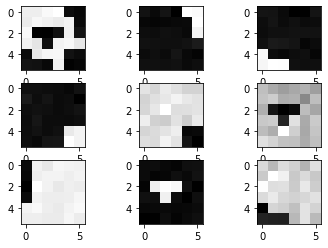

In [14]:
f, ax = plt.subplots(3,3)
for i in range(9):
    ax[i % 3, i // 3].imshow(fig[i].reshape(6,6), 'gray')